<a href="https://colab.research.google.com/github/apissmr/Machine-Learning_2024/blob/JS-4/Praktikum1JS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

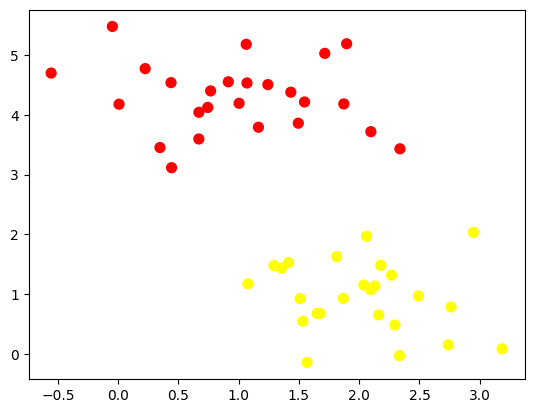

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

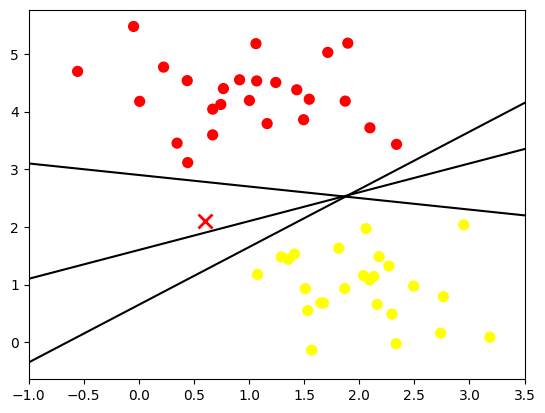

In [24]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

(-1.0, 3.5)

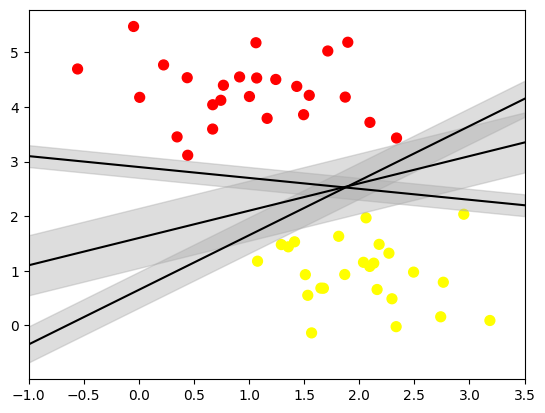

In [25]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

In [26]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [31]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

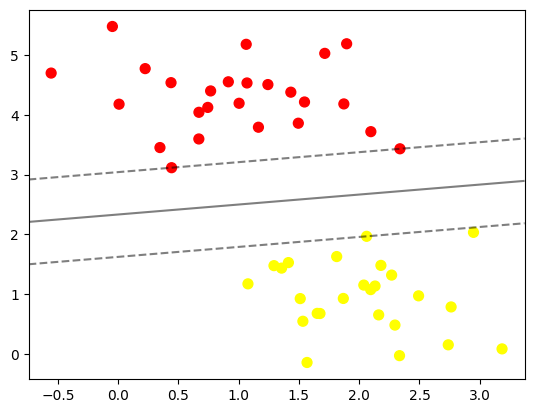

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [33]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

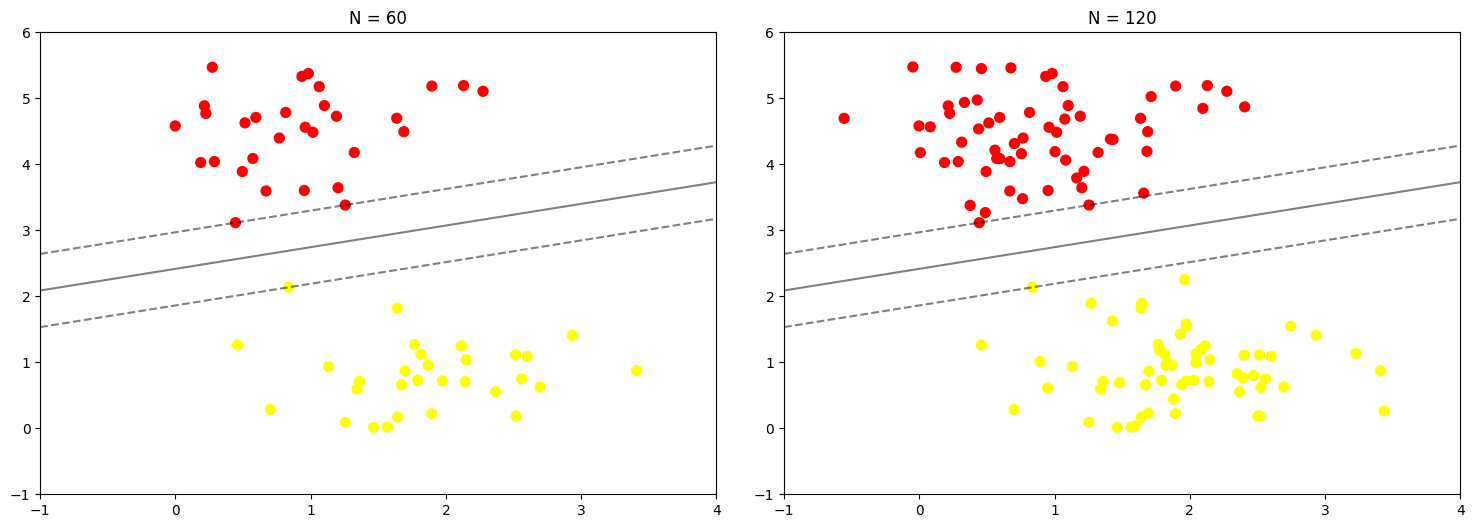

In [34]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

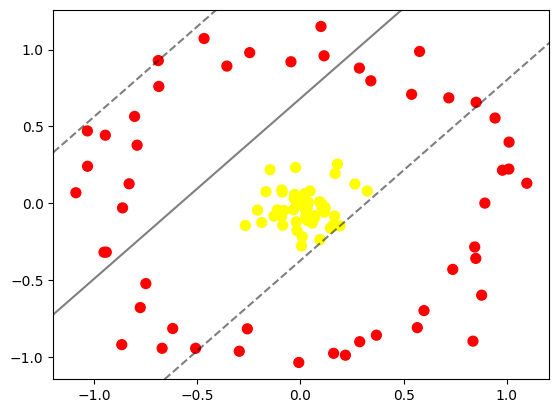

In [35]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [36]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 4.81125477e-03, -2.78419986e-01],
       [-1.08731405e+00,  6.80883548e-02],
       [ 2.33811472e-02, -3.62853132e-02],
       [ 1.14633311e-01, -5.85662053e-02],
       [-1.46825439e-01,  2.18454309e-01],
       [-2.57059074e-01, -8.18223593e-01],
       [-6.69748414e-01, -9.44851887e-01],
       [ 3.41143884e-02, -1.12594802e-01],
       [-2.66673957e-01, -1.44801904e-01],
       [ 1.65823323e-01, -8.33273390e-02],
       [-2.37686166e-02,  2.32887688e-01],
       [ 1.03970353e-01, -2.39714964e-02],
       [-9.51156411e-01, -3.19454104e-01],
       [ 8.93174795e-01,  4.31783393e-04],
       [ 1.68009273e-01,  1.93475859e-01],
       [ 2.85570992e-01,  8.79839922e-01],
       [-6.18302851e-01, -8.16145358e-01],
       [ 5.65924289e-01, -8.10491922e-01],
       [ 3.67899018e-01, -8.59616977e-01],
       [ 1.19667792e-01, -2.77652809e-02],
       [ 1.00944377e+00,  2.22339599e-01],
       [ 5.98464035e-01, -6.99346586e-01],
       [ 1.01047416e+00,  3.97863113e-01],
       [-1.87152224e-01, -1.25800783e-01],
       [-8.65235205e-01, -9.21381721e-01],
       [ 3.14351245e-02, -9.86288134e-02],
       [-8.61325230e-01, -3.06610018e-02],
       [ 1.58853060e-01, -1.41848495e-01],
       [ 8.49293316e-01, -3.59526382e-01],
       [-4.57983150e-02,  9.21030703e-01],
       [ 9.42563636e-01,  5.54788049e-01],
       [ 2.17952283e-01, -9.89959710e-01],
       [-1.67223080e-01,  7.50415936e-02],
       [-7.88290011e-03, -1.03740686e+00],
       [-1.12003905e-01, -4.35175937e-02],
       [-8.03100824e-01,  5.65093102e-01],
       [ 9.78464863e-01,  2.14779699e-01],
       [ 2.16842033e-02, -2.82122057e-02],
       [ 1.44890047e-01, -1.61978042e-01],
       [ 2.59156026e-02, -8.45662764e-02],
       [ 8.85037546e-03, -2.18679662e-01],
       [-8.79275097e-02,  7.27287498e-02],
       [-9.44777103e-01,  4.42834644e-01],
       [-6.85694540e-01,  7.60359436e-01],
       [ 8.77689380e-01, -5.99177046e-01],
       [ 5.72749505e-02, -1.29694305e-01],
       [ 7.37633819e-01, -4.31170654e-01],
       [-3.10660370e-02,  3.15011269e-02],
       [-8.58368914e-02, -1.43556778e-01],
       [ 9.29014097e-02,  9.80604677e-03],
       [ 4.97234031e-02, -8.27330090e-02],
       [-2.07515192e-01, -4.52201322e-02],
       [-1.86222407e-02, -7.00353452e-03],
       [ 5.38462036e-01,  7.08898222e-01],
       [-1.65696888e-02, -1.78423988e-01],
       [ 8.35473180e-01, -8.98601303e-01],
       [ 2.08005263e-02,  6.22751392e-02],
       [ 3.23801694e-01,  7.91077751e-02],
       [ 7.18650084e-01,  6.85989838e-01],
       [ 1.91161207e-01, -1.48396970e-01],
       [ 2.64057993e-01,  1.25105453e-01],
       [ 1.09629772e+00,  1.29854688e-01],
       [ 5.77000717e-01,  9.88199228e-01],
       [-5.07475392e-01, -9.45101529e-01],
       [ 8.50859064e-01,  6.57331818e-01],
       [-7.48567710e-01, -5.23648138e-01],
       [ 3.80070050e-02,  6.11700256e-03],
       [-3.56207656e-01,  8.92965954e-01],
       [-2.01016794e-02, -1.20899704e-01],
       [ 1.17392336e-01, -4.76131055e-02],
       [-1.03088797e+00,  2.40409636e-01],
       [ 1.60715252e-01, -9.77850449e-01],
       [ 4.69265980e-02,  7.93704819e-02],
       [ 3.41000966e-01,  7.97032801e-01],
       [-7.97781878e-02, -4.73072443e-02],
       [-1.28335049e-01, -8.41920923e-02],
       [ 8.43996347e-01, -2.85144233e-01],
       [-8.29542465e-01,  1.26238048e-01],
       [ 1.79396011e-01,  2.55082545e-01],
       [-7.37223432e-04,  1.99098135e-02],
       [-7.75490041e-01, -6.79845134e-01],
       [ 9.96125649e-02,  1.15091049e+00],
       [-9.09585836e-02, -8.54163611e-02],
       [-1.03172967e+00,  4.70694475e-01],
       [-7.90901832e-01,  3.77665112e-01],
       [ 3.30019882e-02, -2.79664044e-02],
       [-4.66529487e-01,  1.07259725e+00],
       [ 6.90774776e-02, -8.14366103e-02],
       [-9.40093299e-01, -3.18843408e-01],
       [ 9.42621793e-02, -2.37434933e-01],
       [-6.88218135e-01,  9.28992178e-01],
       [-9.01941666e-02,  8.63607842e-02

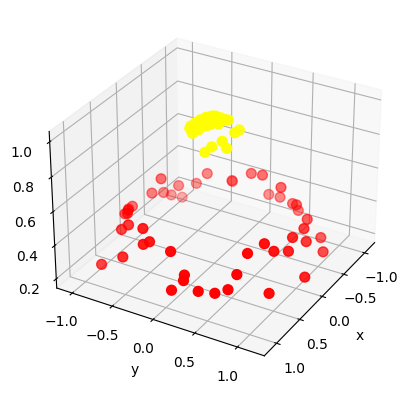

In [37]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X),y=fixed(y))

In [38]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

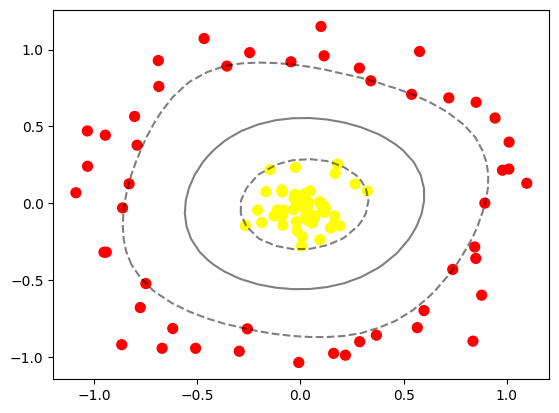

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

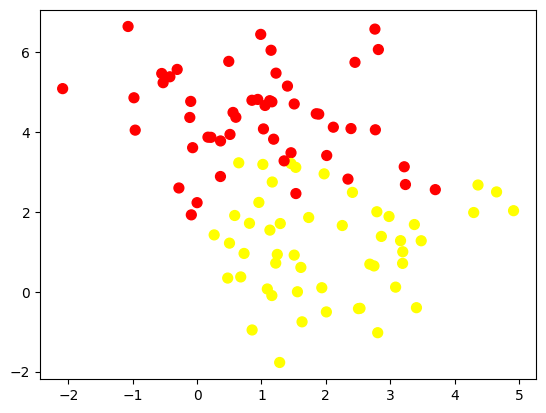

In [40]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

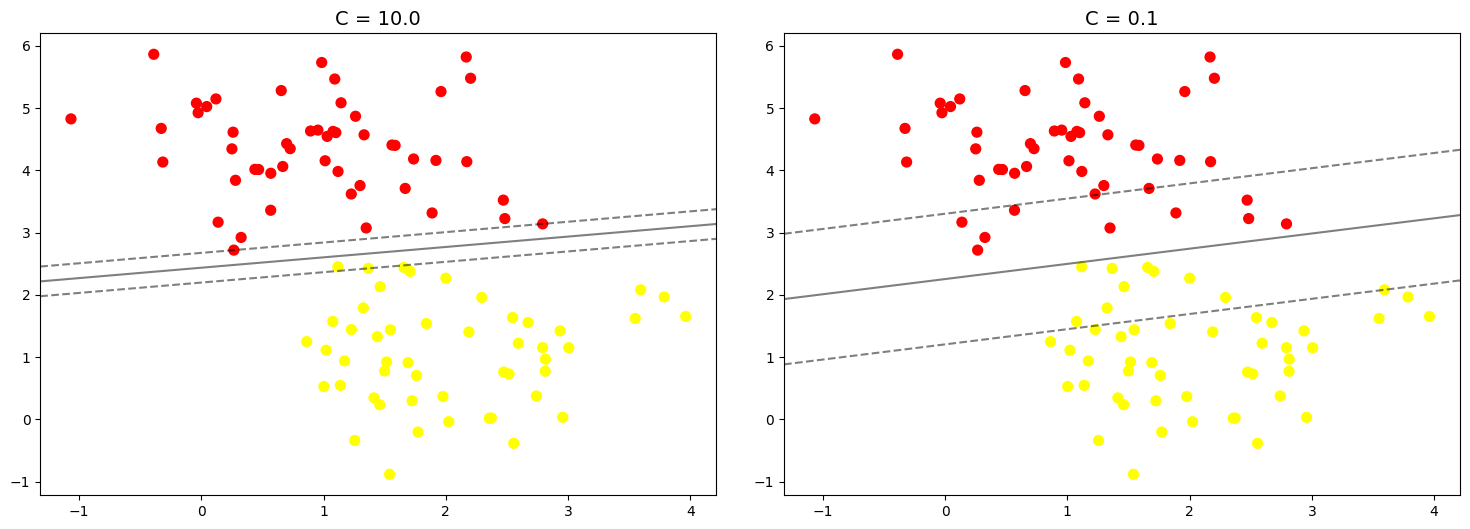

In [41]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)